In [1]:
# import basic data science libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv")
print( df.head() )

print( df.info() )

   UDI Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
0    1     M14860    M                298.1  ...    0    0    0    0
1    2     L47181    L                298.2  ...    0    0    0    0
2    3     L47182    L                298.1  ...    0    0    0    0
3    4     L47183    L                298.2  ...    0    0    0    0
4    5     L47184    L                298.2  ...    0    0    0    0

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]       

In [3]:
# map categorical variable 'diagnosis' into numeric

df["Type"] = df["Type"].map({'H': 2, 'M': 1, 'L': 0})
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# drop redundant columns / unneeded columns
# df.drop('id', axis=1, inplace=True)

df.drop('UDI', axis=1, inplace=True)
df.drop('TWF', axis=1, inplace=True)
df.drop('HDF', axis=1, inplace=True)
df.drop('PWF', axis=1, inplace=True)
df.drop('OSF', axis=1, inplace=True)
df.drop('RNF', axis=1, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  int64  
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
print( df_num.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB
None


In [7]:
# check for NA values
df_num.isna().any()

Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
dtype: bool

In [8]:

# look at the mean of different features for both the classes to see which features capture the variability

df_num.groupby('Machine failure').mean()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,,
0,0.504917,299.973999,309.995570,1540.260014,39.629655,106.693717
1,0.368732,300.886431,310.290265,1496.486726,50.168142,143.781711


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

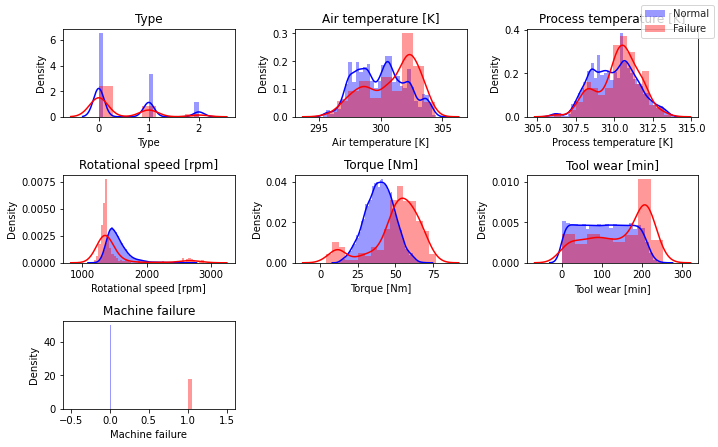

In [9]:
# Plot frequency distributions of the features to visualize which features capture the most variability

df_normal = df_num[df_num['Machine failure'] == 0]
df_failure = df_num[df_num['Machine failure'] == 1]

fig = plt.figure(figsize=(10,20))
for i,col_name in enumerate(list(df_num.columns[0:30])):
    i +=1
    ax = fig.add_subplot(10,3,i)
    sns.distplot(df_normal[col_name], label = 'Normal', kde = True, color= 'b')
    sns.distplot(df_failure[col_name], label= 'Failure', kde = True, color= 'r')
    ax.set_title(col_name)

sns.set_style("whitegrid")
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

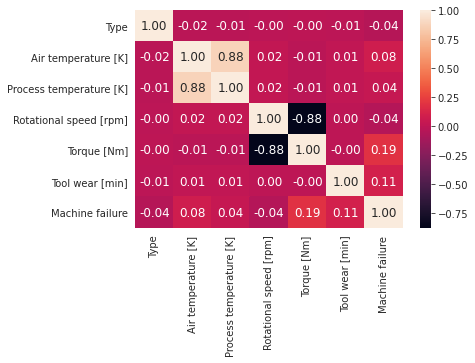

In [10]:
# calculate correlation matrix
corr = df_num.corr()# plot the heatmap
# , cmap=sns.diverging_palette(220, 20, as_cmap=True)
corr_heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.2f', annot_kws={'size': 12})

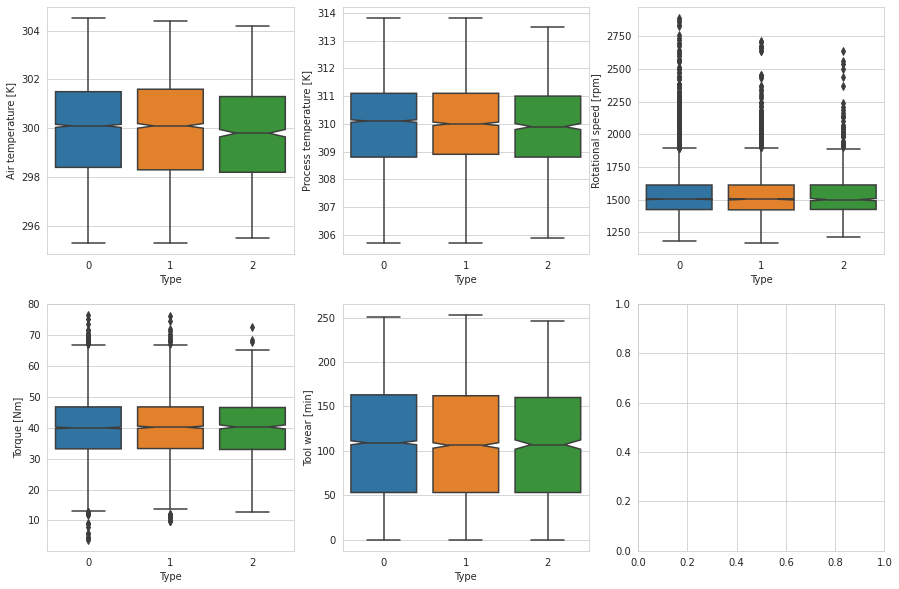

In [11]:
numerical = [
  'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'
]
categorical = [
  'Type'
]

#housing = housing[numerical + categorical]
#housing.shape

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

#for var, subplot in zip(categorical, ax.flatten()):
#    sns.boxplot(x='MACHINE_FAILURE', y='MACHINE_FAILURE', data=housing, ax=subplot)

# sns.boxplot(x='MACHINE_FAILURE', y='AIR_TEMPERATURE', data=df_num, ax=subplot)

for var, subplot in zip(numerical, ax.flatten()):
	
  sns.boxplot(x='Type', y=var, data=df_num, ax=subplot, notch=True)



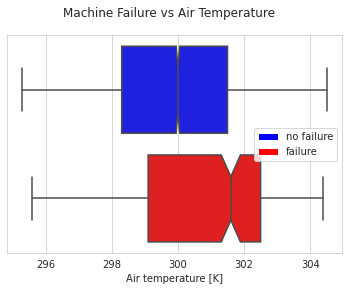

In [12]:

fig2, ax2 = plt.subplots()

sns.boxplot(x="Air temperature [K]", y="Machine failure", data=df_num, orient="h", palette={1:"red", 0:"blue"}, ax=ax2, notch=True)

ax2.get_yaxis().set_visible(False)

fig2.suptitle("Machine Failure vs Air Temperature")

color_patches = [
    Patch(facecolor="blue", label="no failure"),
    Patch(facecolor="red", label="failure")
]
ax2.legend(handles=color_patches);


In [13]:
df_normal = df_num[df_num['Machine failure'] == 0]
df_failure = df_num[df_num['Machine failure'] == 1]

type_count_normal_series = df_normal['Type'].value_counts() 

print( type_count_normal_series )

type_count_fail_series = df_failure['Type'].value_counts() 

print( type_count_fail_series )

type_0_ratio = type_count_fail_series.get(0) / type_count_normal_series.get(0)
type_1_ratio = type_count_fail_series.get(1) / type_count_normal_series.get(1)
type_2_ratio = type_count_fail_series.get(2) / type_count_normal_series.get(2)

print( type_0_ratio )
print( type_1_ratio )
print( type_2_ratio )

0    5765
1    2914
2     982
Name: Type, dtype: int64
0    235
1     83
2     21
Name: Type, dtype: int64
0.040763226366001735
0.02848318462594372
0.021384928716904276


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


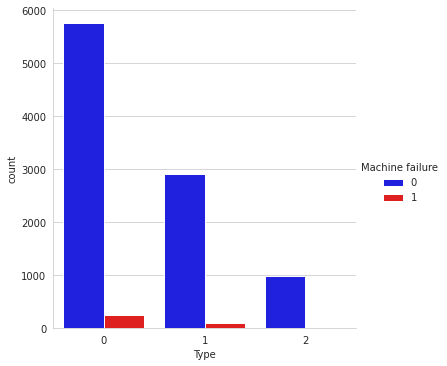

In [15]:
# need to account for the [ Type, Machine failure ] comparison

fig3, ax3 = plt.subplots()

sns.catplot(x="Type", hue="Machine failure", data=df_num, kind="count", palette={0:"blue", 1:"red"}, ax=ax3)

plt.close(1) # catplot creates an extra figure we don't need

#ax.legend(title="Machine Performance")
#ax.set_xticklabels(["Failure", "Normal"])
#ax.set_xlabel("Machine Type")

fig3.suptitle("Normal Operations vs Failure: Predictive Maintenance");

In [16]:

df_num.head(200)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
195,0,298.3,308.5,1453,42.9,89,0
196,2,298.3,308.6,1432,49.5,91,0
197,1,298.4,308.6,1527,40.9,96,0
198,0,298.4,308.7,1588,35.0,99,0


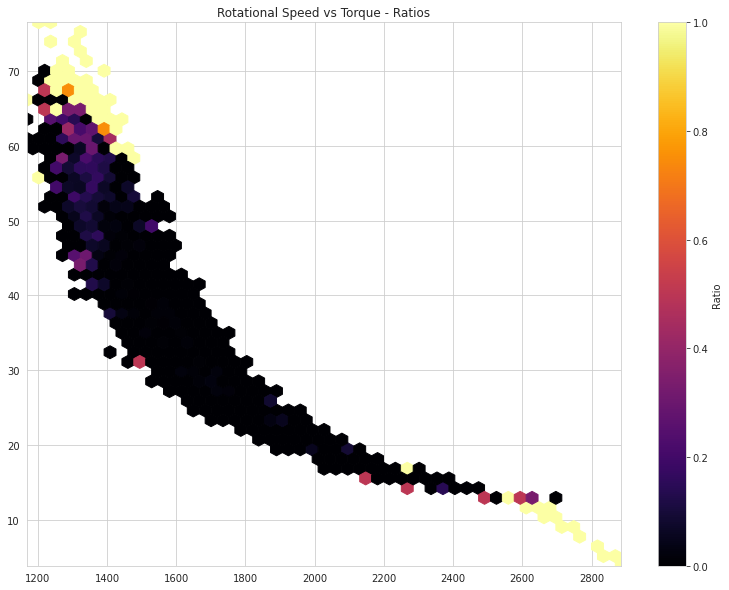

In [17]:

def reduce_C_function_ratio(C):
  all_count = len(C)

  one_count = np.sum(C)

  return one_count / float(all_count);


y = df_num['Torque [Nm]']
x = df_num['Rotational speed [rpm]']
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=1,  figsize=(12, 10)) #sharey=True,

fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs
hb = ax.hexbin(x, y, C=df_num['Machine failure'], gridsize=50, cmap='inferno', reduce_C_function=reduce_C_function_ratio) #np.sum)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Rotational Speed vs Torque - Ratios")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Ratio')

In [18]:
# need to calculate MTBF stats for dataset

df_failure


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
50,0,298.9,309.1,2861,4.6,143,1
69,0,298.9,309.0,1410,65.7,191,1
77,0,298.8,308.9,1455,41.3,208,1
160,0,298.4,308.2,1282,60.7,216,1
161,0,298.3,308.1,1412,52.3,218,1
...,...,...,...,...,...,...,...
9758,0,298.6,309.8,2271,16.2,218,1
9764,0,298.5,309.5,1294,66.7,12,1
9822,0,298.5,309.4,1360,60.9,187,1
9830,0,298.3,309.3,1337,56.1,206,1


In [19]:
TotalRuntimeForFailures = df_failure['Tool wear [min]'].sum()
print (TotalRuntimeForFailures)

number_failed_devices = df_failure['Tool wear [min]'].count()

print( "Failed Device Count: " + str(number_failed_devices))

mtbf = TotalRuntimeForFailures / number_failed_devices * 1.0

print("mtbf: " + str(mtbf) + " minutes")

48742
Failed Device Count: 339
mtbf: 143.78171091445427 minutes
